# Database

In [ ]:
import pandas as pd

# Try different encodings
encodings_to_try = ['latin1', 'cp1252', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        print(f"Trying to read with {encoding} encoding...")
        data = pd.read_csv('chatbot_res_int_bu.csv', encoding=encoding)
        print(f"Success! File read with {encoding} encoding.")
        # Optional: Save as UTF-8 for future use
        # data.to_csv('chatbot_res_int_bu_utf8.csv', index=False, encoding='utf-8')
        break
    except UnicodeDecodeError:
        print(f"Failed with {encoding} encoding.")
    except Exception as e:
        print(f"Error with {encoding} encoding: {str(e)}")

Trying to read with latin1 encoding...
Success! File read with latin1 encoding.


In [ ]:
import pandas as pd
data = pd.read_csv('chatbot_res_adv.csv')
# data1 = pd.read_csv('chatbot_evaluation/chatbot_res_beg.csv')

data['chatbot_response']
# data["gpt4o_mini_response"] = data1["gpt4o_mini_response"]
# data.to_csv('chatbot_res_int.csv', index=False)
# print(data1["gpt4o_mini_response"])

0     ### What is an Array?\n\nAn **array** is a fun...
1     Absolutely! Let's dive into the world of linke...
2     Absolutely! Letâs dive into the stack data s...
3     ### Understanding Queues: A Comprehensive Over...
4     Absolutely! Letâs dive into the bubble sort ...
5     Absolutely, let's dive into QuickSort! QuickSo...
6     Absolutely, let's dive into binary search tree...
7     Absolutely! Let's dive into the comparison bet...
8     ### What is Dynamic Programming?\n\nDynamic Pr...
9     Absolutely! Let's dive into graph traversal al...
10    Great question! Understanding the difference b...
11    Absolutely! Letâs dive into Dijkstraâs alg...
12    Great to see your interest in sorting algorith...
13    ### Balanced Trees: An Overview\n\n**Definitio...
14    Absolutely! Let's dive into recursion, a funda...
15    Absolutely! Letâs dive into the Quicksort al...
16    ### Understanding Binary Search\n\nBinary sear...
17    Absolutely! Let's dive into the world of *

In [ ]:
import pandas as pd
data = pd.read_csv('chatbot_res_int_bu.csv')
# data1 = pd.read_csv('chatbot_evaluation/chatbot_res_beg.csv')

# data["gpt4o_mini_response"] = data1["gpt4o_mini_response"]
# data.to_csv('chatbot_res_int.csv', index=False)
# print(data1["gpt4o_mini_response"])

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
from utils.db_connection import ChatDatabase

db = ChatDatabase('chat.db')

chat_history = db.load_chat_history("0122656d-8999-4ae9-89d2-5f4d6c2ebd02", "0122656d-8999-4ae9-89d2-5f4d6c2ebd02_1")
messages = []
for message in chat_history:
    if message["role"] == "user":
        messages.append(HumanMessage(content=message["content"]))
        print(message["content"])
    else:
        messages.append(AIMessage(content=message["content"]))
        print(message["content"])
        


## Clear Chat History

In [ ]:
db.clear_chat_history("0122656d-8999-4ae9-89d2-5f4d6c2ebd02", "0122656d-8999-4ae9-89d2-5f4d6c2ebd02_1")

In [8]:
# db.update_user_level("0122656d-8999-4ae9-89d2-5f4d6c2ebd02", "Beginner")
db.update_user_level("afbe95ce-80d7-4a8b-9a2f-b3f68bb87323", "")

# db.update_user_level("0122656d-8999-4ae9-89d2-5f4d6c2ebd02", "Advanced")

True

In [ ]:
print(db.get_user_by_username("roylwz2"))

In [ ]:
db.reset_recommendation_timestamp("0122656d-8999-4ae9-89d2-5f4d6c2ebd02")

In [ ]:
from datetime import datetime, timedelta

# print(db.get_topic_recommendations_from_db("0122656d-8999-4ae9-89d2-5f4d6c2ebd02"))
saved_data = db.get_topic_recommendations_from_db("afbe95ce-80d7-4a8b-9a2f-b3f68bb87323")
saved_recommendations = saved_data.get("recommendations", [])
saved_timestamp = saved_data.get("timestamp")
print(saved_timestamp)
print(saved_recommendations)


## Reset Last Analysis Time

In [7]:
db.reset_analysis_timestamp("afbe95ce-80d7-4a8b-9a2f-b3f68bb87323" )

True

## Get User Topics

In [17]:
import json
from langchain_core.messages import AIMessage, HumanMessage
from utils.db_connection import ChatDatabase

db = ChatDatabase('chat.db')
result = db.get_user_topics(user_id="afbe95ce-80d7-4a8b-9a2f-b3f68bb87323")
print(json.loads(result))

{'sorting_algorithms': ['insertion_sort']}


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Book2.csv')

# # Display the first few rows of the dataframe
# print(df.head())

# # Get basic information about the dataframe
# print(df.info())

# # Get statistical summary of the numerical columns
# print(df.describe())

# responses = ["Hi","ewfwefwe",""]

# df["output1"] = responses

In [ ]:
from test_templates.text_template import text_workflow
from langchain_core.messages import HumanMessage

responses = []

langgraph_config = {"configurable": {"thread_id": 1}}
for i, q in enumerate(df['question']):
    prompt = q
    inputs = {
        "messages": [HumanMessage(prompt)],
        "user_level": "beginner"
    }

    current_graph = text_workflow.compile()
    
    try:
    
        output = current_graph.invoke(inputs, langgraph_config)
        response = output["messages"][-1].content
        responses.append(response)
    
    except Exception as e:
        responses.append("None")
    
df["output1"] = responses
df.to_csv('Output.csv', index=False)


In [ ]:
df2 = pd.read_csv("Book1.csv")

In [ ]:
df["output1"] = responses

df.to_csv("Book3.csv", index=False)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:32b",
    temperature=0,
    # other params...
)

# for i, q in enumerate(df['question']):
#     response = llm.invoke([HumanMessage(content=q)])
#     print(response.content)

response = llm.invoke([HumanMessage(content="how confident are you in explaining all data structures and algorithms information? out of 10")])

print(response.content)

# Graph Flow


c:\Users\Elroy Lian\.conda\envs\chatbot\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2025-03-16 23:03:40,785 - datasets - INFO - PyTorch version 2.6.0+cu118 available.
2025-03-16 23:03:41,621 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device_name: cuda
2025-03-16 23:03:41,622 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
2025-03-16 23:03:45,277 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device_name: cuda
2025-03-16 23:03:45,278 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
2025-03-16 23:03:50,648 - __main__ - INFO - Setting up retrieval workflow graph


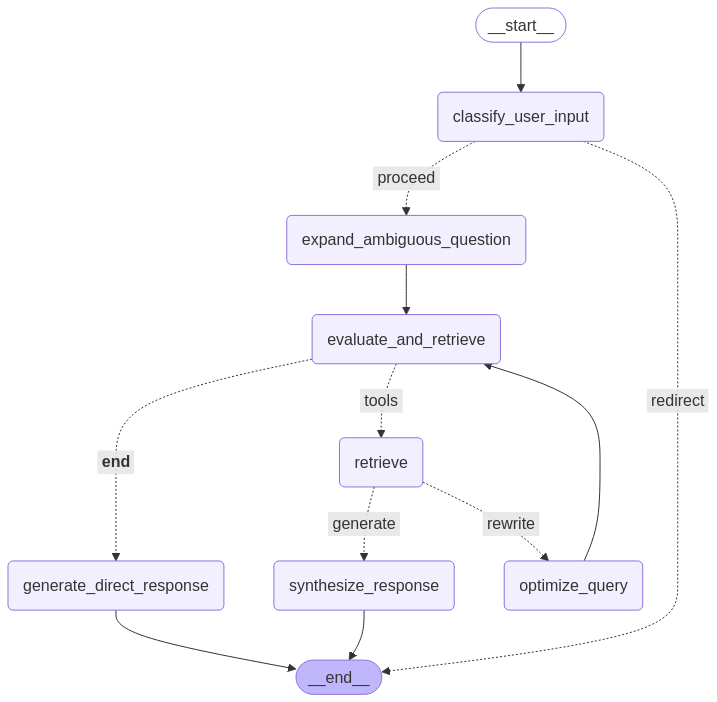

In [21]:
"""
DSA Chatbot Retrieval System

This module handles document retrieval and response generation for DSA queries.
It implements a workflow for validating input, retrieving relevant information,
and generating level-appropriate responses.
"""

import logging
from typing import Annotated, Dict, List, Literal, Sequence, Any, Optional, Tuple
from typing_extensions import TypedDict

from langchain.tools.retriever import create_retriever_tool
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field, field_validator
from langgraph.prebuilt import ToolNode, tools_condition 
from langgraph.graph.message import add_messages
from langgraph.graph import END, StateGraph, START

import streamlit as st
from utils.chunk_doc import get_retriever
from utils.model import get_llm

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Constants for prompts
LANGUAGE_CHECK_PROMPT = """Analyze ONLY the current input for language:

Current input: {question}

Determine if this input contains ANY non-English text or characters.
Return:
1. message_type: 'non_english' if ANY non-English content is present, 'english' if input is entirely in English
2. response: "I can only communicate in English. Please rephrase your question in English." for non-English content"""

CONTENT_CLASSIFICATION_PROMPT = """Classify the user's intent based on their input in a DSA (Data Structures and Algorithms) chatbot context.

Previous conversation:
{context}

Current input: {question}

Classify the intent into ONE of these categories:
- dsa: Questions about data structures, algorithms, complexity analysis, implementation, or problem-solving
- pleasantry: Greetings, thanks, goodbyes, conversational acknowledgments, or questions about previous responses
- other: Non-DSA technical questions or topics outside the scope of DSA

For pleasantries: Respond naturally like a friendly tutor
For other: Tell user that it is out of your scope and redirect them to ask about DSA while being encouraging

Return:
1. message_type: 'dsa', 'pleasantry', or 'other'
2. response: Appropriate response for non-DSA inputs"""

# Consolidated Question Clarification Prompt with Topic Detection
QUESTION_CLARIFICATION_PROMPT = """
You are a specialized DSA question processor working with a conversational AI system. Your task is to transform user questions into clear, context-aware queries while preserving the original intent.

<Previous_Conversation>
{context}
</Previous_Conversation>

<Current_Question>
{question}
</Current_Question>

<Analysis_Guidelines>
- Determine if this is a new topic or a follow-up to the previous conversation.
- Assess whether the question is sufficiently clear as stated.
- Consider if the user's intent is obvious despite brevity.
- Evaluate if additional context would improve clarity.
</Analysis_Guidelines>

<Clarification_Principles>
1. Minimal intervention: Make the smallest changes needed for clarity.
2. Intent preservation: Never change what the user is asking about.
3. Natural language: Output should sound like a human question.
4. Context awareness: Use conversation history intelligently.
5. Topic boundaries: Don't carry implementation details across unrelated topics.
IMPORTANT: When users mention just an algorithm or data structure name (e.g., "insertion sort", "binary trees"), they typically want a general explanation. Transform these into natural-sounding questions that ask for an explanation, but avoid formulaic expansions that sound robotic.
</Clarification_Principles>

<Output_Requirements>
- Return a natural-sounding, clear question.
- If the original question is already clear, return it unchanged.
- Ensure the question is a complete sentence.
- Use conversation context only when necessary to resolve ambiguity.
- Never explain your reasoning - return only the clarified question.
</Output_Requirements>

Return ONLY the clarified question with no explanations or additional text.
"""


RETRIEVAL_PROMPT = """You are a knowledgeable DSA expert assistant specializing in Data Structures and Algorithms. Your responses must be accurate, clear, and tailored to the user's expertise (beginner, intermediate, or advanced). For every question, follow these steps:

1. **Assess Information Needs**  
   - Determine if additional reference details are required, such as:
     - Specific implementation examples or pseudocode.
     - Detailed time/space complexity analysis or proofs.
     - Concrete examples or edge cases.
     - Comparisons between alternative algorithms or data structures.

2. **Utilize Resources Effectively**  
   - If specific details are needed, use the `retrieve_documents` tool to fetch relevant information.
   - Integrate the retrieved information to enhance the accuracy and clarity of your answer.
   - Provide a direct answer when additional references are unnecessary.

3. **Response Guidelines**  
   - Be clear, concise, and focused on accuracy.
   - Use language appropriate to the user’s level, avoiding unnecessary jargon for beginners.
   - Include examples, code snippets, or pseudocode when they aid understanding.
   - Balance theoretical concepts with practical implementation details.
   - Always discuss time and space complexity for algorithm-related questions.

Remember: Your top priority is to deliver precise, helpful, and context-aware DSA explanations that empower users to understand and solve problems effectively."""

DOCUMENT_GRADING_PROMPT = """You are a DSA expert grading retrieved content for both Data Structures and Algorithms topics.
<Question>
{question}
</Question>

<Retrieved Content>
{content}
</Retrieved Content>

<Grading Criteria>
Grade this content on:
1. Relevance: Does it directly address the DSA concepts in the question?
2. Completeness: Does it cover all aspects needed for a good answer?
3. Technical Accuracy: Is the DSA information correct and precise?
4. Algorithm Coverage: Does it adequately explain algorithmic concepts if the question is about algorithms?
5. Data Structure Coverage: Does it properly explain data structure concepts if the question is about data structures?
</Grading Criteria>

Example DSA concepts to check for:
- Data structure definitions, properties, operations, and implementations
- Algorithm steps, processes, complexity, and correctness
- Time/space complexity analysis
- Implementation details and pseudocode
- Common use cases, trade-offs, and alternatives
- Comparisons between different approaches

Based on your assessment, make a decisive recommendation:
- Answer "GENERATE" if the content is good enough to generate a response (relevance > 0.6, overall quality sufficient)
- Answer "REWRITE" if the content isn't relevant or complete enough and we should try to get better content

<Output Instruction>
Your answer must be ONLY one word: either "GENERATE" or "REWRITE".
</Output Instruction>
"""

QUERY_OPTIMIZATION_PROMPT = """
Look at the input and try to reason about the underlying semantic intent / meaning.

Here is the initial question:
-------
{question} 
-------

Formulate an improved question that will yield better search results for Data Structures and Algorithms concepts. 
Make it more specific, include relevant technical terms, and focus on the core DSA concept being asked about.
"""

RESPONSE_GENERATION_PROMPT = """
You are a friendly, conversational DSA tutor named DSA Bot. Your responses should be natural, engaging, and carefully tailored to avoid repetition.

<Question>
{question}
</Question>

<Reference_Material>
{context}
</Reference_Material>

<User_Level>
{level_requirements}
</User_Level>

<Previous_Exchanges>
{conversation_history}
</Previous_Exchanges>

<Strict_Rules>
1. NEVER repeat explanations, analogies, examples, or code from previous exchanges - this is your #1 priority
2. If you catch yourself about to repeat information, STOP and use a different approach
3. For follow-up questions about the same topic, ONLY provide the new information requested
4. Do NOT restate basic definitions or concepts you've already covered
</Strict_Rules>

<Conversation_Flow>
1. Start with a brief, friendly acknowledgment of the question 
2. For questions on topics previously discussed:
   - Use phrases like "Building on our previous discussion..." or "As we saw earlier..."
   - Reference but don't repeat the earlier explanation
   - Focus ONLY on what's new or different in this question

3. For completely new topics:
   - Use a fresh, engaging introduction
   - Provide a concise explanation with examples appropriate to user level

4. For follow-up questions (like "java code?" or "what's the time complexity?"):
   - Answer DIRECTLY without restating what was already covered
   - Use transitional phrases like "Now for the Java implementation..." or "Regarding time complexity..."

5. End with a brief, engaging closing that invites further exploration
</Conversation_Flow>

<Voice_And_Style>
- Use varied sentence structures and transitions
- Be warm and encouraging
- Speak naturally like a friendly tutor, not a textbook
- Adapt your tone to the user's level (more casual for beginners, more technical for advanced)
- Use occasional questions to engage the user
- Incorporate light humor where appropriate
</Voice_And_Style>

<Type_Specific_Instructions>
If the user asks for:
1. A different programming language implementation:
   - Say "Here's the implementation in [language]:" and ONLY show the code
   - Do NOT re-explain the algorithm logic unless specifically asked
   
2. Time/space complexity:
   - If already mentioned, just elaborate on the specific aspects asked about
   - Don't restate the full explanation
   
3. Clarification on a concept:
   - Focus narrowly on the specific confusion point
   - Reference but don't repeat previous explanations
</Type_Specific_Instructions>

Respond accordingly based on the previous exchanges, user's competency level, and the DSA content provided.
"""

# ===== Models and Type Definitions =====

class AgentState(TypedDict):
    """State schema for the retrieval workflow"""
    messages: Annotated[Sequence[BaseMessage], add_messages]
    user_level: str

# We're keeping this model to maintain backward compatibility with existing references
class ValidationResult(BaseModel):
    """Model for input validation results"""
    message_type: str = Field(
        description="Type of message: 'dsa', 'pleasantry', 'non_english', or 'other'"
    )
    response: str = Field(
        description="Response for non-DSA inputs"
    )
    
    @field_validator('message_type')
    def validate_message_type(cls, v):
        valid_types = ['dsa', 'pleasantry', 'non_english', 'other', 'english']
        if v not in valid_types:
            raise ValueError(f"message_type must be one of {valid_types}")
        return v


# ===== Utility Functions =====

def format_conversation_context(messages: List[BaseMessage], max_messages: int = 10) -> str:
    """
    Format conversation context from messages
    
    Args:
        messages: List of conversation messages
        max_messages: Maximum number of recent messages to include
        
    Returns:
        Formatted conversation text
    """
    context_messages = messages[-max_messages:-1] if len(messages) > max_messages else messages[:-1]
    return "\n".join([
        f"{'User: ' if isinstance(m, HumanMessage) else 'Assistant: '}{m.content}"
        for m in context_messages
    ])


def get_message_content(message):
    """
    Safely extract text content from a message that might have different formats
    
    Args:
        message: The message to extract content from
        
    Returns:
        String content of the message
    """
    if isinstance(message.content, str):
        return message.content
    elif isinstance(message.content, list):
        # For multimodal content
        text_parts = []
        for item in message.content:
            if isinstance(item, dict) and item.get("type") == "text":
                text_parts.append(item.get("text", ""))
        return " ".join(text_parts)
    return str(message.content)


def handle_workflow_error(e: Exception, messages, user_level, step_name="workflow", default_next="end"):
    """
    Centralized error handling for workflow nodes
    
    Args:
        e: The exception that occurred
        messages: Current message list
        user_level: Current user level
        step_name: Name of the step where error occurred
        default_next: Default next step
        
    Returns:
        Error response state
    """
    logger.error(f"Error in {step_name}: {str(e)}", exc_info=True)
    return {
        "messages": [*messages, AIMessage(content="I'm having trouble processing that. Could you try again?")],
        "user_level": user_level,
        "next": default_next
    }


# ===== Node Functions =====

def check_language(question: str) -> ValidationResult:
    """
    Check if the input is in English
    
    Args:
        question: User's input text
        
    Returns:
        ValidationResult with language assessment
    """
    llm = get_llm(temperature=0.5)
    language_prompt = PromptTemplate(
        template=LANGUAGE_CHECK_PROMPT,
        input_variables=["question"]
    )
    language_chain = language_prompt | llm.with_structured_output(ValidationResult)
    return language_chain.invoke({"question": question})


def handle_non_english_input(messages, user_level):
    """
    Handle non-English input by returning appropriate response
    
    Args:
        messages: Current message list
        user_level: Current user level
        
    Returns:
        Updated state
    """
    logger.info("Non-English input detected")
    return {
        "messages": [*messages, AIMessage(content="I can only communicate in English. Please rephrase your question in English.")],
        "user_level": user_level,
        "next": "redirect"
    }


def check_content_type(context: str, question: str) -> ValidationResult:
    """
    Classify the content type of the input
    
    Args:
        context: Conversation context
        question: User's input
        
    Returns:
        ValidationResult with content classification
    """
    llm = get_llm(temperature=0.5)
    classification_prompt = PromptTemplate(
        template=CONTENT_CLASSIFICATION_PROMPT,
        input_variables=["context", "question"]
    )
    chain = classification_prompt | llm.with_structured_output(ValidationResult)
    return chain.invoke({"context": context, "question": question})


def proceed_with_dsa_query(messages, user_level):
    """
    Proceed with DSA-related query
    
    Args:
        messages: Current message list
        user_level: Current user level
        
    Returns:
        Updated state
    """
    logger.info("DSA input detected, proceeding with retrieval")
    return {
        "messages": messages, 
        "user_level": user_level, 
        "next": "proceed"
    }


def redirect_non_dsa_query(messages, user_level, response):
    """
    Redirect non-DSA query with appropriate response
    
    Args:
        messages: Current message list
        user_level: Current user level
        response: Response message for non-DSA query
        
    Returns:
        Updated state
    """
    logger.info("Non-DSA input detected, redirecting")
    return {
        "messages": [*messages, AIMessage(content=response)], 
        "user_level": user_level, 
        "next": "redirect"
    }


def classify_user_input(state: AgentState) -> Dict[str, Any]:
    """
    Classify user input as DSA-related, pleasantry, non-English, or other.
    
    Args:
        state: Current state containing messages and user level
        
    Returns:
        Updated state with classification result and next action
    """
    logger.info("Classifying user input")
    messages = state["messages"]
    user_level = state["user_level"]
    
    try:
        # Get user's question from the latest message
        question = get_message_content(messages[-1])
        
        # Check if current message is in English
        language_result = check_language(question)
        if language_result.message_type == "non_english":
            return handle_non_english_input(messages, user_level)
        
        # Get conversation context
        conversation_context = format_conversation_context(messages)
        
        # Classify English input
        content_result = check_content_type(conversation_context, question)
        
        if content_result.message_type == "dsa":
            return proceed_with_dsa_query(messages, user_level)
        else:
            return redirect_non_dsa_query(messages, user_level, content_result.response)
            
    except Exception as e:
        return handle_workflow_error(e, messages, user_level, "classify_user_input", "proceed")


def expand_ambiguous_question(state: AgentState) -> Dict[str, Any]:
    """
    Process questions by determining if they are new topics or follow-ups
    and applying appropriate clarification.
    
    Args:
        state: Current state containing messages and user level
        
    Returns:
        Updated state with processed question
    """
    logger.info("Processing question context and clarification")
    messages = state["messages"]
    user_level = state["user_level"]
    
    try:
        # Get the current question
        current_question = get_message_content(messages[-1])
        
        # Get conversation context with increased history
        max_context_messages = 10
        context_messages = messages[-max_context_messages-1:-1] if len(messages) > max_context_messages+1 else messages[:-1]
        conversation_context = "\n".join([
            f"{'User: ' if isinstance(m, HumanMessage) else 'Assistant: '}{get_message_content(m)}"
            for m in context_messages
        ])
        
        # Initialize LLM with zero temperature for consistent output
        llm = get_llm(temperature=0)
        
        # Use the consolidated clarification prompt that handles both
        # topic detection and appropriate clarification
        clarification_prompt = PromptTemplate(
            template=QUESTION_CLARIFICATION_PROMPT,
            input_variables=["context", "question"]
        )
        
        clarified_response = llm.invoke([
            HumanMessage(content=clarification_prompt.format(
                context=conversation_context,
                question=current_question
            ))
        ])
        
        clarified_question = clarified_response.content.strip()
        
        # If the clarified question is different from the original, use it
        if clarified_question and clarified_question != current_question:
            logger.info(f"Question processed: '{current_question}' -> '{clarified_question}'")
            return {
                "messages": [*messages[:-1], HumanMessage(content=clarified_question)], 
                "user_level": user_level
            }
        else:
            logger.info("No changes needed to question")
            return {
                "messages": messages, 
                "user_level": user_level
            }
            
    except Exception as e:
        return handle_workflow_error(e, messages, user_level, "expand_ambiguous_question")


def evaluate_and_retrieve(state: AgentState) -> Dict[str, Any]:
    """
    Generate a response or use tools to retrieve information based on the query.
    
    Args:
        state: Current state containing messages and user level
        
    Returns:
        Updated state with response or tool invocation
    """
    logger.info("Evaluating query and deciding whether to retrieve documents")
    messages = state["messages"]
    user_level = state["user_level"]
    
    try:
        # Prepare messages with system instruction
        full_messages = [
            HumanMessage(content=RETRIEVAL_PROMPT),
            *messages
        ]
        
        # Initialize model with tools
        retriever = get_retriever()
        retriever_tool = create_retriever_tool(
            retriever,
            "retrieve_documents",
            """Search and return relevant documents based on user's query."""
        )
        
        tools = [retriever_tool]
        llm = get_llm().bind_tools(tools)
        
        # Get response
        response = llm.invoke(full_messages)
        logger.info("LLM response or tool invocation generated")
        
        return {"messages": [response]}
        
    except Exception as e:
        error_msg = "I'm having trouble answering that question right now. Could you please rephrase it?"
        return {"messages": [AIMessage(content=error_msg)]}


def assess_document_relevance(state: AgentState) -> Literal["generate", "rewrite"]:
    """
    Grade retrieved documents for relevance and completeness.
    
    Args:
        state: Current state containing messages and retrieval results
        
    Returns:
        Decision string: 'generate' or 'rewrite'
    """
    logger.info("Assessing document relevance")
    
    messages = state["messages"]
    
    try:
        # Extract question and retrieved content
        if len(messages) < 2:
            logger.warning("Not enough messages for assessment")
            return "rewrite"
            
        question = get_message_content(messages[-2])
        retrieved_docs = get_message_content(messages[-1])
        
        if not retrieved_docs or len(retrieved_docs.strip()) < 10:
            logger.warning("Retrieved documents are empty or too short")
            return "rewrite"
    
        # Initialize model with lower temperature for consistent grading
        llm = get_llm(temperature=0)
        
        # Create grading prompt
        prompt = PromptTemplate(
            template=DOCUMENT_GRADING_PROMPT,
            input_variables=["question", "content"]
        )
        
        # Get direct decision
        response = llm.invoke([
            HumanMessage(content=prompt.format(
                question=question,
                content=retrieved_docs
            ))
        ])
        
        decision = response.content.strip().upper()
        
        # Safeguard against unexpected responses
        if decision != "GENERATE" and decision != "REWRITE":
            logger.warning(f"Unexpected grading decision: {decision}. Defaulting to REWRITE")
            return "rewrite"
        
        logger.info(f"Document assessment: {decision}")
        return "generate" if decision == "GENERATE" else "rewrite"

    except Exception as e:
        logger.error(f"Error in assess_document_relevance: {str(e)}", exc_info=True)
        # On error, default to rewrite for safety
        return "rewrite"


def optimize_query(state: AgentState) -> Dict[str, Any]:
    """
    Reformulate the query to get better search results.
    
    Args:
        state: Current state containing messages
        
    Returns:
        Updated state with reformulated query
    """
    logger.info("Optimizing query")
    messages = state["messages"]
    
    try:
        # Find the original question
        if not messages:
            logger.warning("No messages found to optimize")
            return {"messages": messages}
            
        question = get_message_content(messages[-1])
        
        # Create optimization prompt
        prompt = PromptTemplate(
            template=QUERY_OPTIMIZATION_PROMPT,
            input_variables=["question"]
        )
    
        # Generate improved question
        llm = get_llm(temperature=0)
        response = llm.invoke([
            HumanMessage(content=prompt.format(question=question))
        ])
        
        optimized_question = response.content.strip()
        logger.info(f"Query optimized: '{question}' -> '{optimized_question}'")
        
        return {"messages": [HumanMessage(content=optimized_question)]}
        
    except Exception as e:
        return handle_workflow_error(e, messages, state["user_level"], "optimize_query")


def get_level_requirements(user_level: str) -> str:
    """
    Get improved content requirements specific to user level.

    Args:
        user_level: User's competency level (beginner, intermediate, advanced)

    Returns:
        A string containing level-specific content requirements.
    """
    level_requirements = {
        "beginner": """
            When explaining to a beginner:

            Start with a friendly, simple explanation that relates to everyday experiences.
            Include a simple, relatable definition with real-world analogies, a step-by-step walkthrough,
            visual descriptions, plain language explanations of why the concept matters, and very simple code examples.
            Additionally, if applicable, briefly mention any performance strengths (for example, that the algorithm 
            is especially efficient for small or nearly sorted lists and is memory-friendly).
            Aim for clarity and conciseness (for instance, around 350 words if it naturally fits), 
            but prioritize ensuring the explanation is accessible and builds confidence.
        """,
        "intermediate": """
            For intermediate learners:

            Provide a balanced explanation that combines both practical implementation and theoretical insights.
            Include a precise definition with proper terminology, a walkthrough of common implementation approaches,
            a moderately complex example, an intuitive time/space complexity analysis, practical code examples or pseudocode,
            and a discussion of common optimizations.
            Aim for a conversational yet technically sound explanation (roughly 400-550 words is a guideline), 
            but adjust based on the depth required.
        """,
        "advanced": """
            For advanced learners:

            Deliver a technically rich, in-depth explanation that respects their expertise.
            Include precise definitions with formal properties, detailed analysis of implementation variations,
            discussions of optimization techniques and their mathematical foundations, connections to broader algorithmic paradigms,
            and an analysis of edge cases.
            Aim for a substantive yet engaging explanation (as a guideline, around 600-800 words), 
            while adapting as needed based on the complexity of the topic.
        """
    }
    
    selected_requirement = level_requirements.get(user_level.lower(), level_requirements["intermediate"])
    logger.debug("LEVEL REQUIREMENT: %s", user_level)
    logger.debug("Selected requirement: %s", selected_requirement)
    return selected_requirement




def synthesize_response(state: AgentState) -> Dict[str, Any]:
    """
    Generate a tailored response based on user level and retrieved content.
    
    Args:
        state: Current state containing messages and user level
        
    Returns:
        Updated state with final response
    """
    logger.info("Synthesizing response")
    messages = state["messages"]
    user_level = state["user_level"]
    
    try:
        # Get question and retrieved docs
        if len(messages) < 2:
            logger.warning("Not enough messages for synthesis")
            return {
                "messages": [AIMessage(content="I couldn't understand your question. Could you please rephrase it?")],
                "user_level": user_level
            }
            
        # Get the current question
        question = get_message_content(messages[-2])
        docs = get_message_content(messages[-1])
        
        if not docs or len(docs.strip()) < 10:
            logger.warning("Retrieved documents too short or empty")
            return {
                "messages": [AIMessage(content="I couldn't find enough information to answer your question. Could you try asking about a different DSA concept?")], 
                "user_level": user_level
            }
        
        # Extract previous assistant messages to check for patterns
        # Only include the last 2-3 exchanges to focus on recent patterns
        previous_responses = []
        for i in range(len(messages) - 3, 0, -2):  # Start from 3 messages back, go backward, step 2
            if i >= 0 and isinstance(messages[i], AIMessage):
                previous_responses.append(get_message_content(messages[i]))
            if len(previous_responses) >= 3:  # Get at most 3 previous responses
                break
                
        conversation_history = "\n\n---\n\n".join(previous_responses)
            
        # Level-specific content requirements
        level_requirements = get_level_requirements(user_level)
        
        # Create response generation prompt
        prompt = PromptTemplate(
            input_variables=['context', 'question', 'level_requirements', 'conversation_history'], 
            template=RESPONSE_GENERATION_PROMPT
        )
        
        # Use higher temperature for more variety
        llm = get_llm(temperature=0.7)
        chain = prompt | llm | StrOutputParser()
        
        response = chain.invoke({
            "context": docs,
            "question": question,
            "level_requirements": level_requirements,
            "conversation_history": conversation_history
        })
        
        logger.info(f"Generated response for user level: {user_level}")
        
        return {
            "messages": [AIMessage(content=response)], 
            "user_level": user_level
        }
        
    except Exception as e:
        return handle_workflow_error(e, messages, user_level, "synthesize_response")

def generate_direct_response(state: AgentState) -> Dict[str, Any]:
    """
    Generate a response directly from the model's knowledge without retrieved content.
    
    Args:
        state: Current state containing messages and user level
        
    Returns:
        Updated state with generated response
    """
    logger.info("Generating direct response without retrieval")
    messages = state["messages"]
    user_level = state["user_level"]
    
    try:
        # Get the current question
        if len(messages) < 1:
            logger.warning("No messages for direct response")
            return {
                "messages": [AIMessage(content="I couldn't understand your question. Could you please rephrase it?")],
                "user_level": user_level
            }
        
        # Find the latest user question
        question = None
        for i in range(len(messages) - 1, -1, -1):
            if isinstance(messages[i], HumanMessage):
                question = get_message_content(messages[i])
                break
        
        if not question:
            logger.warning("No question found for direct response")
            return {
                "messages": [AIMessage(content="I'm not sure what you're asking. Could you please clarify your question?")],
                "user_level": user_level
            }
        
        # Extract previous assistant messages to check for patterns
        previous_responses = []
        for i in range(len(messages) - 3, 0, -2):  # Start from 3 messages back
            if i >= 0 and isinstance(messages[i], AIMessage):
                previous_responses.append(get_message_content(messages[i]))
            if len(previous_responses) >= 3:  # Get at most 3 previous responses
                break
                
        conversation_history = "\n\n---\n\n".join(previous_responses)
            
        # Level-specific content requirements
        level_requirements = get_level_requirements(user_level)
        
        # Use the same RESPONSE_GENERATION_PROMPT but with guidance for direct knowledge
        prompt = PromptTemplate(
            input_variables=['context', 'question', 'level_requirements', 'conversation_history'], 
            template=RESPONSE_GENERATION_PROMPT
        )
        
        # Initialize LLM with appropriate temperature
        llm = get_llm(temperature=0.7)
        chain = prompt | llm | StrOutputParser()
        
        # Use a note instead of retrieved content to guide the model
        knowledge_note = "Note: Please answer this question based on your knowledge of data structures and algorithms without external references."
        
        response = chain.invoke({
            "context": knowledge_note,
            "question": question,
            "level_requirements": level_requirements,
            "conversation_history": conversation_history
        })
        
        logger.info(f"Generated direct response for user level: {user_level}")
        
        return {
            "messages": [AIMessage(content=response)], 
            "user_level": user_level
        }
        
    except Exception as e:
        return handle_workflow_error(e, messages, user_level, "generate_direct_response")
# ===== Graph Setup =====

def create_retrieval_graph() -> StateGraph:
    """
    Create and configure the retrieval workflow graph.
    
    Returns:
        Configured StateGraph ready for compilation
    """
    logger.info("Setting up retrieval workflow graph")
    
    # Initialize retriever for the tool node
    retriever = get_retriever()
    retriever_tool = create_retriever_tool(
        retriever,
        "retrieve_documents",
        """Search and return relevant documents based on user's query."""
    )
    
    # Create state graph with schema
    workflow = StateGraph(AgentState)
    
    # Add nodes
    workflow.add_node("classify_user_input", classify_user_input)
    workflow.add_node("expand_ambiguous_question", expand_ambiguous_question)
    workflow.add_node("evaluate_and_retrieve", evaluate_and_retrieve)
    workflow.add_node("retrieve", ToolNode([retriever_tool]))
    workflow.add_node("synthesize_response", synthesize_response)  # For retrieval-based responses
    workflow.add_node("generate_direct_response", generate_direct_response)  # For direct knowledge responses
    workflow.add_node("optimize_query", optimize_query)
    
    # Add edges
    workflow.add_edge(START, "classify_user_input")
    
    # Conditional edges from classification
    workflow.add_conditional_edges(
        "classify_user_input",
        lambda x: x.get("next", "redirect"),  # Default to end if not specified
        {
            "proceed": "expand_ambiguous_question",
            "redirect": END
        }
    )
    
    # After clarification, go to retrieval or direct response generation
    workflow.add_edge("expand_ambiguous_question", "evaluate_and_retrieve")
    
    # Tool handling
    workflow.add_conditional_edges(
        "evaluate_and_retrieve",
        tools_condition,
        {
            "tools": "retrieve",
            END: "generate_direct_response",
        }
    )
    
    # Document relevance assessment
    workflow.add_conditional_edges(
        "retrieve",
        assess_document_relevance,
        {
            "generate": "synthesize_response",
            "rewrite": "optimize_query",
        }
    )
    
    # Final edges
    workflow.add_edge("synthesize_response", END)
    workflow.add_edge("generate_direct_response", END)
    workflow.add_edge("optimize_query", "evaluate_and_retrieve")
    
    return workflow


# Initialize the graph (to be compiled by the calling code)
text_workflow = create_retrieval_graph()

graph= text_workflow.compile()

from IPython.display import Image, display


display(Image(graph.get_graph().draw_mermaid_png()))

## Recursive Graph Testing

In [1]:
import os
import streamlit as st
from langchain_core.messages import HumanMessage

os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY']= st.secrets["New_Langsmith_key"]
os.environ['LANGCHAIN_PROJECT']="error testing"

from test_templates.text_template import text_workflow
langgraph_config = {"configurable": {"thread_id": "evaluation_test_nil"}}
current_graph = text_workflow.compile()

    
# Get chatbot response
inputs = {
    "messages": [HumanMessage(content="What is Bellman-Ford algorithm and how does it differ from Dijkstra's?")],
    "user_level": "intermediate"
}

# Compile the graph for each question
output = current_graph.invoke(inputs, langgraph_config)
chatbot_response = output["messages"][-1].content

c:\Users\Elroy Lian\.conda\envs\chatbot\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2025-03-17 00:14:31,968 - test_templates.text_template - INFO - Setting up retrieval workflow graph
2025-03-17 00:14:32,018 - test_templates.text_template - INFO - Classifying user input
2025-03-17 00:14:32,924 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-17 00:14:33,950 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-17 00:14:35,114 - test_templates.text_template - INFO - DSA input detected, proceeding with retrieval
2025-03-17 00:14:35,116 - test_templates.text_template - INFO - Processing question context and clarification
2025-03-17 00:14:36,313 - httpx - INFO - HTTP 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-17 00:14:39,167 - test_templates.text_template - INFO - Assessing document relevance
2025-03-17 00:14:40,516 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-17 00:14:40,580 - test_templates.text_template - INFO - Document assessment: REWRITE
2025-03-17 00:14:40,581 - test_templates.text_template - INFO - Optimizing query
2025-03-17 00:14:40,582 - test_templates.text_template - INFO - Original query: What is the Bellman-Ford algorithm, and how does it differ from Dijkstra's algorithm?
2025-03-17 00:14:41,376 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-17 00:14:42,083 - test_templates.text_template - INFO - Evaluating query and deciding whether to retrieve documents
2025-03-17 00:14:42,084 - test_templates.text_template - WARNING - Maximum retrieval attempts reached (1). Falling back to direct generation.
2025-03-17 00:14:42,086 - test_templates.text_template - IN

In [ ]:
"""
Document Processing Module for DSA Chatbot

This module handles the processing of image and PDF documents,
providing specialized DSA explanations based on document content.
"""

import logging
import json
import re
from typing import Annotated, Dict, List, Literal, Sequence, Any, Optional
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.graph import END, StateGraph, START
import streamlit as st

from utils.model import get_llm

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Constants
DEFAULT_MODEL = "gpt-4o-mini"

class AgentState(TypedDict):
    """State management for the document processing workflow"""
    messages: Annotated[Sequence[BaseMessage], add_messages]
    user_level: str
    pdf_context: str = ""  # Field to store PDF context

# Keep this model for compatibility but use a simpler approach
class DocumentAnalysisResult(BaseModel):
    """Structured output for document analysis"""
    contains_dsa_content: bool = Field(description="Whether the document contains DSA-related content")
    identified_concepts: list = Field(description="List of DSA concepts identified in the document")
    confidence_score: float = Field(description="Confidence score for DSA content identification (0-1)")
    document_type: str = Field(description="Type of document: 'image', 'text', or 'both'")

def generate_dsa_response(state: AgentState) -> Dict[str, Any]:
    """
    Generate a conversational response about the DSA concepts in the document.
    
    Args:
        state: Current state containing messages, user level, and PDF context
        
    Returns:
        Updated state with generated response
    """
    logger.info("Generating DSA response for document")
    
    messages = state["messages"]
    user_level = state["user_level"]
    pdf_context = state.get("pdf_context", "")
    
    # Determine if we have PDF content
    has_pdf = pdf_context and len(pdf_context) > 0
    
    # Enhanced system message with PDF context support
    system_msg = (
        f"You are a friendly DSA tutor having a conversation about the concepts shown in the document. Make complex concepts accessible and engaging as if you're chatting with a {user_level} level student.\n\n"
    
    "When explaining the document content:\n"
    "1. Start with a warm, conversational introduction about what you're seeing\n"
    "2. Break down the main concepts naturally, as if you're pointing things out to a friend\n"
    "3. Use everyday language and analogies when appropriate\n"
    "4. Express genuine interest in the interesting aspects of the concepts\n"
    "5. Connect ideas to what they might already know\n\n"
    
    "For this {user_level} level user, ensure your explanation:\n"
    f"- Has the right technical depth for a {user_level}\n"
    "- Uses a warm, approachable tone throughout\n"
    "- Feels like a natural conversation, not a formal analysis\n"
    "- Connects theory to practical understanding\n\n"
    
    "Remember to explain key elements like:\n"
    "- How the data structure works or how the algorithm functions\n"
    "- Important operations and their implications\n"
    "- Time and space complexity in appropriate language\n"
    "- Any notable patterns or strategies shown in the document\n\n"
    
    "End your response with a thoughtful question or suggestion for further exploration."
)
    
    # Add PDF context if available
    if has_pdf:
        system_msg += f"\n\nPDF CONTENT:\n{pdf_context}"
        logger.info("PDF context added to system message")
    
    try:
        # Initialize model
        llm = get_llm()
        
        # Create full message list with system prompt
        full_messages = [
            HumanMessage(content=system_msg),
            messages[-1]  # The message containing image and/or text query
        ]
        
        # Get response
        response = llm.invoke(full_messages)
        logger.info("Generated response for document")
        
        return {
            "messages": [AIMessage(content=response.content)],
            "user_level": user_level,
            "pdf_context": pdf_context
        }
        
    except Exception as e:
        logger.error(f"Error generating response: {str(e)}", exc_info=True)
        error_msg = "I had some trouble understanding the document. Could you tell me more about what you'd like to learn about the DSA concepts in it?"
        return {
            "messages": [AIMessage(content=error_msg)],
            "user_level": user_level,
            "pdf_context": pdf_context
        }

def validate_document_content(state: AgentState) -> Dict[str, Any]:
    """
    Validate if the document contains DSA-related content.
    
    Args:
        state: Current state containing messages, user level, and PDF context
        
    Returns:
        Updated state with validation result and next action
    """
    logger.info("Validating document content for DSA relevance")
    
    messages = state["messages"]
    latest_message = messages[-1]
    user_level = state["user_level"]
    pdf_context = state.get("pdf_context", "")
    
    # Determine document type
    has_image = isinstance(latest_message.content, list) and any(item.get("type") == "image_url" for item in latest_message.content)
    has_pdf = pdf_context and len(pdf_context) > 0
    document_type = "both" if (has_image and has_pdf) else ("image" if has_image else "text")
    
    logger.info(f"Document type: {document_type}")
    
    try:
        # System message for simple validation
        validation_prompt = f"""As a helpful DSA tutor, take a look at this document and determine if it contains Data Structures & Algorithms concepts.

        I'm looking for things like:
        - Visualizations or descriptions of data structures
        - Algorithm explanations or flowcharts
        - Code implementations of DSA concepts
        - Discussion of algorithmic efficiency or complexity

        Based on what you see, simply respond with one of these options:
        - "DSA_CONTENT_HIGH_CONFIDENCE" if you're confident it contains DSA material
        - "DSA_CONTENT_LOW_CONFIDENCE" if there might be some DSA content but you're not sure
        - "NO_DSA_CONTENT" if you don't see any relevant DSA content

        Just the option text is needed - no other explanation.
        """
        
        # Add PDF context to prompt if available
        if has_pdf:
            validation_prompt += f"\n\nPDF CONTENT:\n{pdf_context}"
        
        # Initialize model and get response
        llm = get_llm(temperature=0)
        validation_response = llm.invoke([
            HumanMessage(content=validation_prompt),
            latest_message  # The message containing document content
        ])
        
        result = validation_response.content.strip().upper()
        logger.info(f"Document validation result: {result}")
        
        # Process response based on content determination
        if result == "NO_DSA_CONTENT":
            logger.info("No DSA content detected in document")
            return {
                "messages": [*messages, AIMessage(content="I don't see any specific DSA concepts in this document. Would you like to discuss a particular DSA topic instead?")],
                "user_level": user_level,
                "pdf_context": pdf_context,
                "next": "end"
            }
        
        if result == "DSA_CONTENT_LOW_CONFIDENCE":
            logger.info("Low confidence in DSA content detection")
            return {
                "messages": [*messages, AIMessage(content="I think I see some DSA concepts here, but I'm not entirely sure. Could you point out what specific part you'd like to discuss?")],
                "user_level": user_level,
                "pdf_context": pdf_context,
                "next": "clarify"
            }
        
        # For high confidence or fallback to generate
        logger.info("DSA content detected with high confidence")
        return {
            "messages": messages,
            "user_level": user_level,
            "pdf_context": pdf_context,
            "next": "generate"
        }
        
    except Exception as e:
        logger.error(f"Error in document validation: {str(e)}", exc_info=True)
        # On error, provide a helpful message and end
        return {
            "messages": [*messages, AIMessage(content="I had trouble analyzing that document. Could you try describing what DSA concepts you're interested in from it?")],
            "user_level": user_level,
            "pdf_context": pdf_context,
            "next": "end"
        }

def clarify_request(state: AgentState) -> Dict[str, Any]:
    """
    Handle cases where document content needs clarification.
    
    Args:
        state: Current state containing messages, user level, and PDF context
        
    Returns:
        Updated state with clarification request
    """
    logger.info("Requesting clarification for document content")
    
    messages = state["messages"]
    user_level = state["user_level"]
    pdf_context = state.get("pdf_context", "")
    
    try:
        llm = get_llm()
        
        clarification_prompt = """Using a friendly, conversational tone:
        1. Acknowledge what you can see in the document
        2. Express what's unclear or needs more detail
        3. Ask specific questions to better understand what they want to learn
        4. Suggest possible DSA topics that might be relevant
        
        Focus equally on data structures AND algorithms in your suggestions.
        Make it feel like a natural conversation!
        """
        
        # Add PDF context if available
        if pdf_context and len(pdf_context) > 0:
            clarification_prompt += f"\n\nPDF CONTENT:\n{pdf_context}"
        
        # Create full message list with system prompt
        full_messages = [
            HumanMessage(content=clarification_prompt),
            messages[-1]  # The message containing document and user query
        ]
        
        # Get response
        response = llm.invoke(full_messages)
        logger.info("Generated clarification request")
        
        return {
            "messages": [AIMessage(content=response.content)],
            "user_level": user_level,
            "pdf_context": pdf_context
        }
        
    except Exception as e:
        logger.error(f"Error in clarification: {str(e)}", exc_info=True)
        fallback_msg = "I'm not quite sure what aspect of this document you'd like to focus on. Could you tell me more about the specific data structure or algorithm you're interested in?"
        return {
            "messages": [AIMessage(content=fallback_msg)],
            "user_level": user_level,
            "pdf_context": pdf_context
        }

# Define workflow
def create_document_text_workflow():
    """Create the document processing workflow graph"""
    logger.info("Setting up document processing workflow graph")
    
    workflow = StateGraph(AgentState)
    
    # Add nodes
    workflow.add_node("validate", validate_document_content)
    workflow.add_node("generate", generate_dsa_response)
    workflow.add_node("clarify", clarify_request)
    
    # Add edges with conditional routing
    workflow.add_edge(START, "validate")
    
    workflow.add_conditional_edges(
        "validate",
        lambda x: x["next"],
        {
            "generate": "generate",
            "clarify": "clarify",
            "end": END
        }
    )
    
    workflow.add_edge("generate", END)
    workflow.add_edge("clarify", END)
    
    return workflow

# Initialize workflow
document_text_workflow = create_document_text_workflow()

graph= document_text_workflow.compile()

from IPython.display import Image, display, Markdown

# Display a title
display(Markdown("### Your Graph Title"))

# Display the image
display(Image(graph.get_graph().draw_mermaid_png()))
